In [317]:
import xarray as xr
import numpy as np
from os.path import expanduser
home = expanduser("~")
import skimage.measure as skm
import matplotlib.pyplot as plt

In [318]:
folder = home + '/Documents/data/obs/GPCP'
fileName = 'GPCP_precip.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (lat: 71, lon: 360, time: 9343)
Coordinates:
  * lat      (lat) float32 -35.0 -34.0 -33.0 -32.0 -31.0 ... 32.0 33.0 34.0 35.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2022-04-30
Data variables:
    precip   (time, lat, lon) float32 ...

In [319]:
precip = ds.precip
precip

<xarray.DataArray 'precip' (time: 9343, lat: 71, lon: 360)>
[238807080 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -35.0 -34.0 -33.0 -32.0 -31.0 ... 32.0 33.0 34.0 35.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2022-04-30
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean
    coordinates:    time latitude longitude

In [320]:
valid_range = [0, 100]
precip = precip.where((precip >= valid_range[0]) & (precip <= valid_range[1]), np.nan)

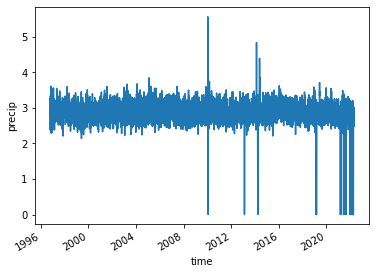

In [321]:
precip.mean(dim = ('lat', 'lon')).plot()

In [ ]:
from metrics.funcs.vars.myFuncs import *

In [ ]:
time_test = '2013-02-09'
plot_snapshot(precip.sel(time=time_test), 'Blues', "Time = " + time_test,'GPCP')

In [322]:
precip = precip.where(precip.sum(dim =('lat','lon')) != 0, np.nan)

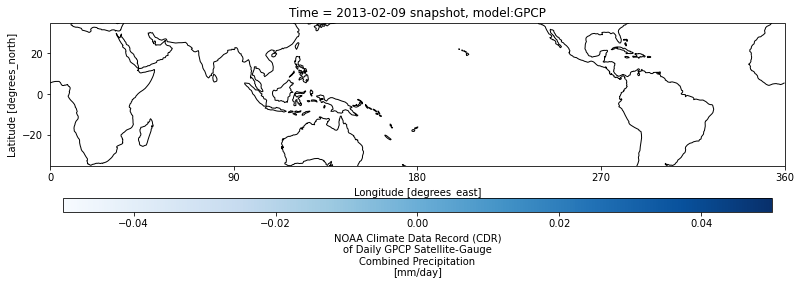

In [324]:
time_test = '2013-02-09'
plot_snapshot(precip.sel(time=time_test), 'Blues', "Time = " + time_test,'GPCP')

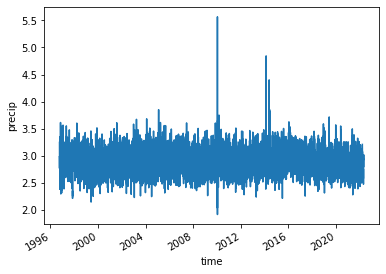

In [325]:
precip.mean(dim = ('lat', 'lon')).plot()

In [326]:
precip = precip.dropna('time', how='all')

In [327]:
time_test = '2013-02-09'
plot_snapshot(precip.sel(time=time_test), 'Blues', "Time = " + time_test,'GPCP')

KeyError: '2013-02-09'

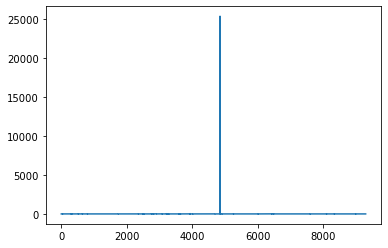

In [328]:
nb_nan = precip.isnull().sum(dim=('lat', 'lon'))
plt.plot(nb_nan)

In [329]:
threshold = 0.5
precip = precip.where(precip.isnull().sum(dim=('lat','lon'))/(precip.shape[1]*precip.shape[2]) < threshold, other=np.nan)

In [330]:
precip = precip.dropna('time', how='all')

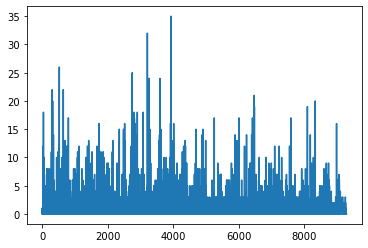

In [331]:
nb_nan = precip.isnull().sum(dim=('lat', 'lon'))
plt.plot(nb_nan)

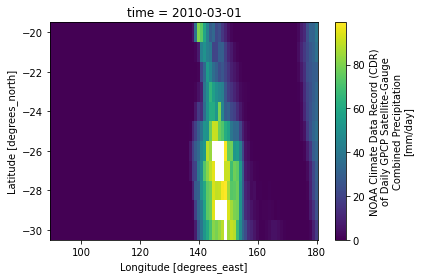

In [333]:
precip.sel(time='2010-03-01').sel(lat=slice(-30,-20), lon=slice(90,180)).plot()

In [334]:
precip

<xarray.DataArray 'precip' (time: 9294, lat: 71, lon: 360)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.24405062e+00, 1.17564774e+00, 5.09209216e-01, ...,
         1.41485035e-01, 2.46518895e-01, 7.92021036e-01],
        [3.70203018e+00, 2.64962578e+00, 1.47164953e+00, ...,
         1.33630061e+00, 1.80621719e+00, 3.90008402e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [1.68807583e+01, 2.28698769e+01, 2.14786377e+01, ...,
         5.49256206e-02, 1.09845746e+00, 6.20279598e+00],
        [3.60136724e+00, 3.67121553e+00, 4.17802906e+00, ...,
         1.61528194e+00, 4.93976176e-01, 2.31147647e+00],
        [5.38746834e+00, 4.11637926e+00, 1.14184189e+00, ...,
         1.28422987e+00, 4.18579483e+00, 4.60221529e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.33176700e-03, 0.00000000e+00, 0.00000000e+00, ...,
         9.51312780e-01, 1.06344268e-01, 6.69635739e-03],
        ...,
        [0.00000000e+00, 0.00000000e+00, 2.27834597e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 3.74256372e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.58364609e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -35.0 -34.0 -33.0 -32.0 -31.0 ... 32.0 33.0 34.0 35.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2022-04-30
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean
    coordinates:    time latitude longitude

In [335]:
precip.interpolate_na(dim=('lat','lon'))

KeyError: ('lat', 'lon')

In [336]:
precip.dims

('time', 'lat', 'lon')

In [377]:
# Create a sample DataArray
data = xr.DataArray(
    np.random.randn(10, 8, 8),
    dims=("time", "lat", "lon"),
    coords={"time": np.arange(10), "lat": [1, 2, 3, 4, 5, 6, 7, 8], "lon": [1, 2, 3, 4, 5, 6, 7, 8]}
)

data[0, 1:4, 1:4] = np.nan


data[0,::]


<xarray.DataArray (lat: 8, lon: 8)>
array([[ 0.40717523,  0.85502898, -0.11240885, -0.85119705, -0.12701609,
        -0.40340126,  0.39964482, -0.42514667],
       [ 0.67451811,         nan,         nan,         nan, -1.05396579,
         0.67100886, -0.42607316, -0.52812377],
       [-0.10242591,         nan,         nan,         nan, -1.79155558,
        -1.34248896,  0.39113683,  0.3217285 ],
       [ 0.84045137,         nan,         nan,         nan,  0.00206695,
        -0.05011018, -0.10654415, -1.0248231 ],
       [ 1.56062249,  0.95752747, -0.66671257, -1.13383811,  0.77818993,
        -1.1932989 ,  0.72197273,  0.70306069],
       [-0.48384098, -1.36577756,  0.29262724, -0.59488736,  0.29697171,
         0.21870011, -1.29469571,  0.04823234],
       [-1.32605837, -0.29229092, -0.29533183,  0.63445987, -0.45179718,
        -0.87479652, -1.67082124,  0.79208157],
       [-0.14620947,  1.95225548, -0.99802034, -0.51700899, -0.49769062,
         0.95667597, -0.00508583,  0.20336791]])
Coordinates:
    time     int64 0
  * lat      (lat) int64 1 2 3 4 5 6 7 8
  * lon      (lon) int64 1 2 3 4 5 6 7 8

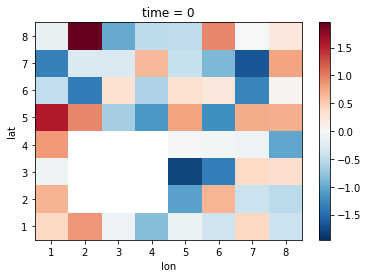

In [378]:
data[0,:,:].plot()

In [375]:
# Interpolate the missing values
data_interp = data.interpolate_na(dim = 'lat', method='polynomial', order=2)

ImportError: dlopen(/opt/anaconda3/lib/python3.9/site-packages/rasterio/_base.cpython-39-darwin.so, 0x0002): Library not loaded: '@rpath/libpoppler.91.dylib'
  Referenced from: '/opt/anaconda3/lib/libgdal.26.dylib'
  Reason: tried: '/opt/anaconda3/lib/libpoppler.91.dylib' (no such file), '/opt/anaconda3/lib/libpoppler.91.dylib' (no such file), '/opt/anaconda3/lib/libpoppler.91.dylib' (no such file), '/opt/anaconda3/lib/python3.9/site-packages/rasterio/../../../libpoppler.91.dylib' (no such file), '/opt/anaconda3/lib/libpoppler.91.dylib' (no such file), '/opt/anaconda3/lib/libpoppler.91.dylib' (no such file), '/opt/anaconda3/lib/python3.9/site-packages/rasterio/../../../libpoppler.91.dylib' (no such file), '/opt/anaconda3/lib/libpoppler.91.dylib' (no such file), '/opt/anaconda3/bin/../lib/libpoppler.91.dylib' (no such file), '/opt/anaconda3/lib/libpoppler.91.dylib' (no such file), '/opt/anaconda3/bin/../lib/libpoppler.91.dylib' (no such file), '/usr/local/lib/libpoppler.91.dylib' (no such file), '/usr/lib/libpoppler.91.dylib' (no such file)

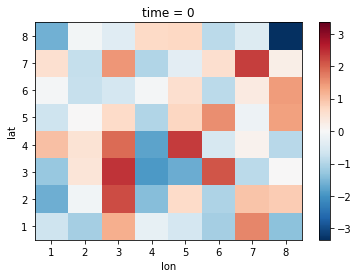

In [376]:
data_interp[0,:,:].plot()